In [1]:
import string

In [2]:
from scipy import stats

In [3]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import re

In [10]:
def find_strength(string):
    value = string.find('/6')
    if string[value-1] is '(':
        return (None)
    else:
        return string[value-1]

In [11]:
def cigar_details(string):
    size = string.split('\n')
    return size[2].strip()

In [12]:
#consider striping '-' before date and turing string into date-time object
def cigar_og_issue_date(string):
    size = string.split('\n')
    return size[3].strip()

In [13]:
#built for df.gauge
def make_int(string):
    try:
        string = int(string)
        return string
    except:
        pass

In [122]:
from fractions import Fraction
#convert some string into floats (inch)
def convert_length_2_float(string):
    try:
        string = string.strip('"')
        string = string.split(' ')
        inch = int(string[0])
        if string[1]:
            fraction = string[1]
        return (inch + float(Fraction(fraction)))
    except:
        return None

In [230]:
#still have 'miscellanious and misc.' as labels, but close enough for now.
def size_filter(string):
    try:
        string = string.lower()
        return(string)
    except:
        return None
    
#code to make a most common sizes data frame.   
#df_common_size = df[df['size'].map(df['size'].value_counts()) > 100]    

In [123]:
#replacement dictionary for the factory country column
country_replacement_dict = {'Cuba':'cub', 'Dominican Republic':'dr', 'Nicaragua':'nic', 'Honduras':'hon', 'Jamaica':'jam',
       'Mexico':'mex', 'U.S.A.':'usa', 'Philippines':'phl', 'Canary Islands':'can', 'Brazil':'brz',
       'Nicaragua, Honduras':'nic', 'Costa Rica':'cst', 'Indonesia':'ind', 'Bahamas':'bah',
       'Panama':'pan', 'nan':None, 'USA':'usa', 'NIcaragua':'nic', 'El Salvador':'sal', 'Colombia':'col',
       'Dominican  Republic':'dr', 'Dominican Repubcic':'dr', 'Dominican Repubilc':'dr',
       'Dom. Rep.':'dr', 'Nicaraqua':'nic', 'U.S.A':'usa', 'Domincan Republic':'dr',
       'Nicarag’ua':'nic', 'Dominican Rep"ublic':'dr'}
#df.country.replace(replacement_dict, inplace=True)

In [124]:
data = pd.read_csv('cigar_aficionado.csv', index_col='Unnamed: 0')

In [125]:
data.shape

(20769, 19)

In [205]:
df = data.copy()

In [206]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [207]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,cub,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,dr,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"


# ttests of score by country 

In [129]:
scores_df = df.groupby("country").filter(lambda x: len(x) > 10)

In [130]:
scores_df.country.value_counts()

dr     8402
nic    4941
hon    3469
cub    2763
usa     371
mex     201
jam     175
cst     117
bah     111
can      88
brz      42
phl      41
ind      19
Name: country, dtype: int64

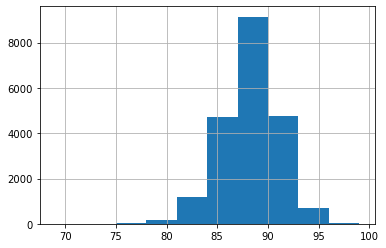

In [131]:
scores_df.score.hist();

count    8402.000000
mean       87.084385
std         2.656531
min        75.000000
25%        85.000000
50%        87.000000
75%        89.000000
max        97.000000
Name: score, dtype: float64


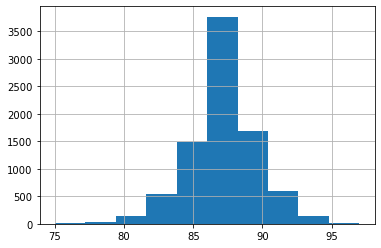

In [132]:
dr_score = scores_df[scores_df.country == 'dr'].score
print(dr_score.describe())
dr_score.hist();

count    2763.000000
mean       89.540355
std         2.364676
min        80.000000
25%        88.000000
50%        90.000000
75%        91.000000
max        99.000000
Name: score, dtype: float64


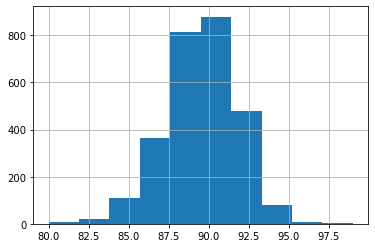

In [133]:
cuba_score = scores_df[scores_df.country == 'cub'].score
print(cuba_score.describe())
cuba_score.hist();

count    4941.000000
mean       88.638939
std         2.487128
min        76.000000
25%        87.000000
50%        89.000000
75%        90.000000
max        97.000000
Name: score, dtype: float64


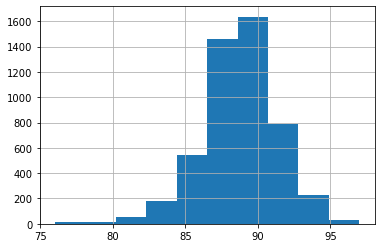

In [134]:
nic_score = scores_df[scores_df.country == 'nic'].score
print(nic_score.describe())
nic_score.hist();

count    3469.000000
mean       87.237532
std         2.756678
min        70.000000
25%        86.000000
50%        87.000000
75%        89.000000
max        96.000000
Name: score, dtype: float64


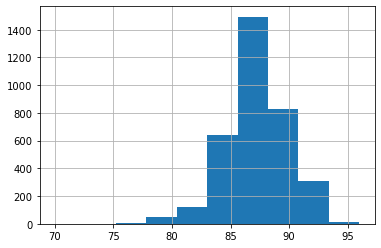

In [135]:
hon_score = scores_df[scores_df.country == 'hon'].score
print(hon_score.describe())
hon_score.hist();

count    371.000000
mean      88.169811
std        2.531051
min       80.000000
25%       87.000000
50%       88.000000
75%       90.000000
max       93.000000
Name: score, dtype: float64


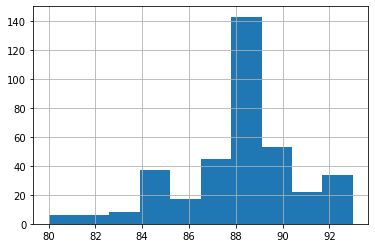

In [136]:
usa_score = scores_df[scores_df.country == 'usa'].score
print(usa_score.describe())
usa_score.hist();

count    175.000000
mean      85.668571
std        2.043742
min       80.000000
25%       84.000000
50%       86.000000
75%       87.000000
max       91.000000
Name: score, dtype: float64


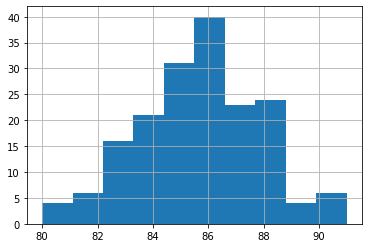

In [137]:
jam_score = scores_df[scores_df.country == 'jam'].score
print(jam_score.describe())
jam_score.hist();

count    201.000000
mean      84.666667
std        4.154917
min       69.000000
25%       82.000000
50%       85.000000
75%       87.000000
max       94.000000
Name: score, dtype: float64


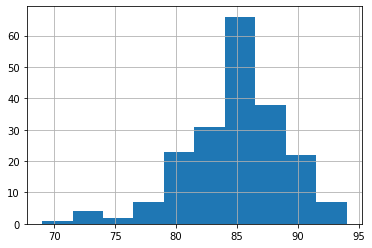

In [138]:
mex_score = scores_df[scores_df.country == 'mex'].score
print(mex_score.describe())
mex_score.hist();

In [139]:
scores_df.score.describe()

count    20740.000000
mean        87.766538
std          2.812987
min         69.000000
25%         86.000000
50%         88.000000
75%         90.000000
max         99.000000
Name: score, dtype: float64

# ttest

In [140]:
nic_usa_ttest = stats.ttest_ind(nic_score, usa_score, equal_var=False, alternative = 'greater')

t-statistic is 3.44729404129025, and p-value is 0.0003113023262242171


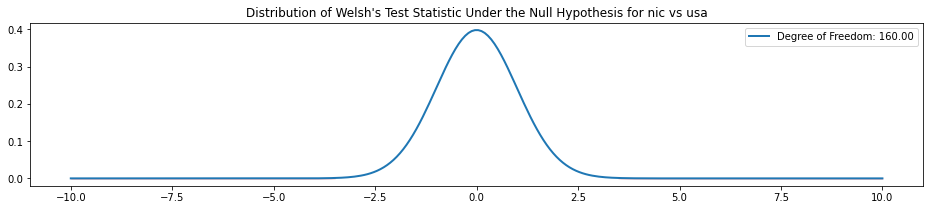

In [141]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-10, 10, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= nic_usa_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= -nic_usa_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for nic vs usa")

print(f"t-statistic is {nic_usa_ttest[0]}, and p-value is {nic_usa_ttest[1]}")


In [142]:
dr_score.mean()
len(dr_score)

8402

In [143]:
cuba_score.mean()
len(cuba_score)

2763

In [144]:
dr_cuba_ttest = stats.ttest_ind(dr_score, cuba_score, equal_var=False,alternative = 'less')

t-statistic is -45.89425465545143, and p-value is 0.0


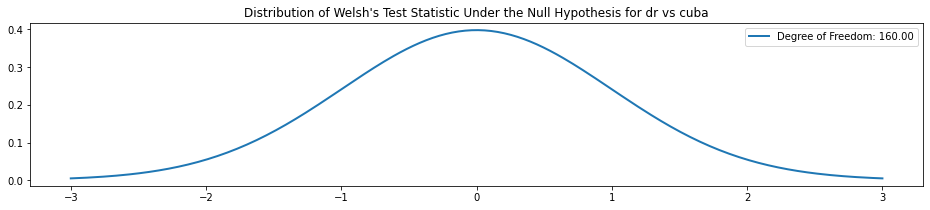

In [145]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -dr_cuba_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= dr_cuba_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for dr vs cuba")

print(f"t-statistic is {dr_cuba_ttest[0]}, and p-value is {dr_cuba_ttest[1]}")


In [146]:
stat, p = stats.f_oneway(dr_score, cuba_score, nic_score, jam_score, hon_score)

In [147]:
print(p)
print(stat)

0.0
672.0690430681683


# fixing the features

In [208]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [209]:
df.country.unique()

array(['cub', 'dr', 'nic', 'hon', 'jam', 'mex', 'usa', 'phl', 'can',
       'brz', 'cst', 'ind', 'bah', 'pan', nan, 'sal', 'col'], dtype=object)

In [210]:
df.gauge.unique()

array([50., 43., 44., 52., 49., 42., 48., 47., 41., 56., 45., 46., 54.,
       38., 36., 51., 34., 35., 30., 40., 55., 60., 58., 64., 33., 32.,
       31., 66., 37., 28., 39., 53., nan, 62., 61., 29., 26., 57.,  5.,
       67., 59.,  6., 65., 70., 24., 63., 80.])

In [281]:
tk_binder = df[df.binder =='TK']

In [283]:
tk_binder

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
9574,https://img.mshanken.com/d/cao/ratings_extras/...,HOYO DE MONTERREY TUBO,85,"6 1/4""",43.0,background:url('https://img.mshanken.com/d/cao...,This rich looking cigar has a lumpy wrapper. T...,lonsdale,"Honduras, Nicaragua, Dom. Rep.",TK,Ecuador,hon,$4.05,\nIssue:\n ...,"[['85', ['Cigar Aficionado: ', ' ...",10740,NaN,Cigar Aficionado,"– Feb 01, 2006"
9605,https://img.mshanken.com/d/cao/ratings_extras/...,MACANUDO MADURO HYDE PARK,84,"5 1/2""",49.0,background:url('https://img.mshanken.com/d/cao...,A dark and toothy cigar. It has some vanilla n...,robusto,"Dom. Rep., Mexico",TK,U.S.A./Conn. Broadleaf,jam,$5.65,\nIssue:\n ...,"[['84', ['Cigar Aficionado: ', ' ...",10772,NaN,Cigar Aficionado,"– Feb 01, 2006"


<AxesSubplot:>

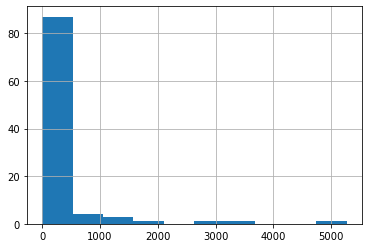

In [274]:
df.wrapp1er.value_counts().hist()

<AxesSubplot:>

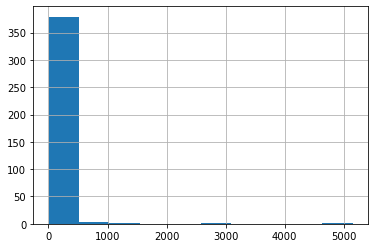

In [276]:
df.filler.value_counts().hist()

In [231]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",robusto,Cuba,Cuba,Cuba,cub,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,dr,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",robusto,Dom. Rep.,Dom. Rep.,Ecuador,dr,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"
